In [1]:
# imports

# python standard libraries
import os
import random

In [2]:
# data processing
import numpy as np
np.set_printoptions(formatter={'float_kind':lambda x: "%.4f" % x})

import pandas as pd
pd.set_option('display.width', 300)
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_colwidth', 200)

In [3]:
# tensorflow
import tensorflow as tf

In [4]:
import keras
from keras.models import Sequential  # V2 is tensorflow.keras.xxxx, V1 is keras.xxx
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.models import load_model

print( f'tf.__version__: {tf.__version__}' )
print( f'keras.__version__: {keras.__version__}' )

tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [5]:
# sklearn
from sklearn.model_selection import train_test_split

In [6]:
# imaging
import cv2
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image

In [7]:
data_dir = '../data/training_data/training_data'
file_list = os.listdir(data_dir)

In [8]:
df = pd.read_csv('../data/training_norm.csv')

In [9]:
df.head()

image_id  angle  speed
0         1 0.4375 0.0000
1         2 0.8125 1.0000
2         3 0.4375 1.0000
3         4 0.6250 1.0000
4         5 0.5000 0.0000

In [10]:
# df['speed'] = ((df['speed']*35)+0).astype('int64')
# df['angle'] = ((df['angle']*80)+50).astype('int64')

In [11]:
df.head()

image_id  angle  speed
0         1 0.4375 0.0000
1         2 0.8125 1.0000
2         3 0.4375 1.0000
3         4 0.6250 1.0000
4         5 0.5000 0.0000

In [12]:
image_id = []
image_name = []
image_path = []
image_array = []
file_size = []
for filename in file_list:
    im = cv2.imread(data_dir + '/' + filename)
    image_name.append(filename)
    image_array.append(im)
    image_path.append(data_dir + '/' + filename)
    file_size.append(os.path.getsize(data_dir + '/' + filename))
    image_id.append(int(filename.split('.')[0]))

In [13]:
data = {
    'image_id': image_id,
    'image_name': image_name,
    'image': image_array,
    'image_path': image_path,
    'file_size': file_size
}

In [14]:
new_df = pd.DataFrame(data)

In [15]:
new_df.head()

image_id image_name                                                                                                                                                                                                    image                                     image_path  file_size
0         1      1.png  [[[134, 135, 139], [134, 135, 139], [136, 139, 139], [136, 139, 139], [126, 140, 144], [128, 142, 147], [136, 143, 149], [139, 146, 151], [147, 157, 153], [147, 157, 153], [140, 145, 156], [134, 1...      ../data/training_data/training_data/1.png     128113
1        10     10.png  [[[14, 13, 16], [13, 12, 14], [11, 13, 13], [11, 13, 13], [11, 14, 11], [10, 13, 10], [11, 13, 13], [11, 13, 13], [11, 13, 13], [11, 13, 13], [10, 13, 10], [10, 13, 10], [10, 12, 12], [11, 13, 13]...     ../data/training_data/training_data/10.png     122343
2       100    100.png  [[[57, 68, 64], [58, 69, 65], [62, 67, 66], [62, 67, 66], [58, 70, 63], [61, 72, 65], [53, 72, 64], [53, 72, 64], [65, 69, 66], [64, 68, 65], [59, 67, 71], [61, 69, 72], [62, 71, 71], [59, 68, 69]...    ../data/training_data/training_data/100.png     123855
3      1000   1000.png  [[[123, 125, 125], [123, 125, 125], [115, 125, 123], [118, 127, 126], [117, 128, 128], [116, 127, 127], [117, 127, 130], [118, 128, 131], [126, 127, 131], [128, 129, 134], [125, 125, 132], [125, 1...   ../data/training_data/training_data/1000.png     122253
4     10000  10000.png  [[[6, 5, 7], [6, 5, 7], [5, 5, 5], [7, 7, 7], [9, 11, 6], [15, 17, 12], [19, 22, 19], [22, 26, 23], [28, 25, 26], [28, 25, 26], [32, 24, 26], [32, 24, 26], [26, 25, 23], [24, 23, 21], [16, 15, 19]...  ../data/training_data/training_data/10000.png     125490

In [16]:
merged_df = pd.merge(df, new_df, how='left', on='image_id')

In [17]:
merged_df.head()

image_id  angle  speed image_name                                                                                                                                                                                                    image                                 image_path  file_size
0         1 0.4375 0.0000      1.png  [[[134, 135, 139], [134, 135, 139], [136, 139, 139], [136, 139, 139], [126, 140, 144], [128, 142, 147], [136, 143, 149], [139, 146, 151], [147, 157, 153], [147, 157, 153], [140, 145, 156], [134, 1...  ../data/training_data/training_data/1.png     128113
1         2 0.8125 1.0000      2.png  [[[160, 144, 142], [155, 140, 138], [156, 136, 128], [165, 144, 136], [109, 113, 103], [106, 109, 100], [108, 109, 107], [113, 114, 111], [120, 114, 120], [124, 117, 123], [128, 122, 114], [129, 1...  ../data/training_data/training_data/2.png     127064
2         3 0.4375 1.0000      3.png  [[[65, 40, 60], [66, 41, 61], [63, 53, 55], [69, 59, 61], [61, 57, 67], [65, 62, 72], [80, 64, 66], [80, 64, 66], [77, 67, 69], [12, 2, 3], [59, 63, 53], [255, 255, 249], [255, 255, 255], [255, 25...  ../data/training_data/training_data/3.png     126239
3         4 0.6250 1.0000      4.png  [[[16, 12, 8], [5, 2, 0], [80, 64, 65], [135, 119, 119], [128, 108, 102], [128, 108, 102], [132, 110, 100], [133, 111, 101], [128, 111, 100], [126, 110, 99], [124, 110, 99], [126, 111, 100], [126,...  ../data/training_data/training_data/4.png     113880
4         5 0.5000 0.0000      5.png  [[[189, 163, 165], [190, 164, 166], [203, 170, 164], [218, 186, 179], [196, 172, 167], [194, 171, 166], [194, 175, 158], [194, 175, 158], [192, 169, 171], [197, 174, 175], [201, 176, 169], [201, 1...  ../data/training_data/training_data/5.png     125944

In [18]:
cleaned_df = merged_df[merged_df['file_size'] > 0]

In [19]:
cleaned_df.head()

image_id  angle  speed image_name                                                                                                                                                                                                    image                                 image_path  file_size
0         1 0.4375 0.0000      1.png  [[[134, 135, 139], [134, 135, 139], [136, 139, 139], [136, 139, 139], [126, 140, 144], [128, 142, 147], [136, 143, 149], [139, 146, 151], [147, 157, 153], [147, 157, 153], [140, 145, 156], [134, 1...  ../data/training_data/training_data/1.png     128113
1         2 0.8125 1.0000      2.png  [[[160, 144, 142], [155, 140, 138], [156, 136, 128], [165, 144, 136], [109, 113, 103], [106, 109, 100], [108, 109, 107], [113, 114, 111], [120, 114, 120], [124, 117, 123], [128, 122, 114], [129, 1...  ../data/training_data/training_data/2.png     127064
2         3 0.4375 1.0000      3.png  [[[65, 40, 60], [66, 41, 61], [63, 53, 55], [69, 59, 61], [61, 57, 67], [65, 62, 72], [80, 64, 66], [80, 64, 66], [77, 67, 69], [12, 2, 3], [59, 63, 53], [255, 255, 249], [255, 255, 255], [255, 25...  ../data/training_data/training_data/3.png     126239
3         4 0.6250 1.0000      4.png  [[[16, 12, 8], [5, 2, 0], [80, 64, 65], [135, 119, 119], [128, 108, 102], [128, 108, 102], [132, 110, 100], [133, 111, 101], [128, 111, 100], [126, 110, 99], [124, 110, 99], [126, 111, 100], [126,...  ../data/training_data/training_data/4.png     113880
4         5 0.5000 0.0000      5.png  [[[189, 163, 165], [190, 164, 166], [203, 170, 164], [218, 186, 179], [196, 172, 167], [194, 171, 166], [194, 175, 158], [194, 175, 158], [192, 169, 171], [197, 174, 175], [201, 176, 169], [201, 1...  ../data/training_data/training_data/5.png     125944

image_path: ../data/training_data/training_data/211.png
steering_Angle: 0.625000
speed: 0.000000


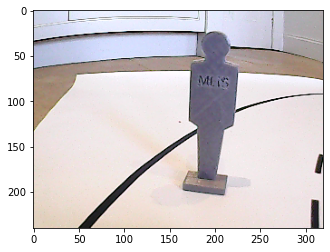

In [20]:
image_index = 210
plt.imshow(Image.open(cleaned_df['image_path'][image_index]))
print("image_path: %s" % cleaned_df['image_path'][image_index])
print("steering_Angle: %f" % cleaned_df['angle'][image_index])
print("speed: %f" % cleaned_df['speed'][image_index])

(array([60.0000, 28.0000, 0.0000, 99.0000, 98.0000, 0.0000, 104.0000,
        213.0000, 0.0000, 428.0000, 1467.0000, 0.0000, 2046.0000, 0.0000,
        1609.0000, 1963.0000, 0.0000, 2007.0000, 2123.0000, 0.0000,
        1147.0000, 301.0000, 0.0000, 65.0000, 35.0000]),
 array([0.0000, 0.0400, 0.0800, 0.1200, 0.1600, 0.2000, 0.2400, 0.2800,
        0.3200, 0.3600, 0.4000, 0.4400, 0.4800, 0.5200, 0.5600, 0.6000,
        0.6400, 0.6800, 0.7200, 0.7600, 0.8000, 0.8400, 0.8800, 0.9200,
        0.9600, 1.0000]),
 <BarContainer object of 25 artists>)

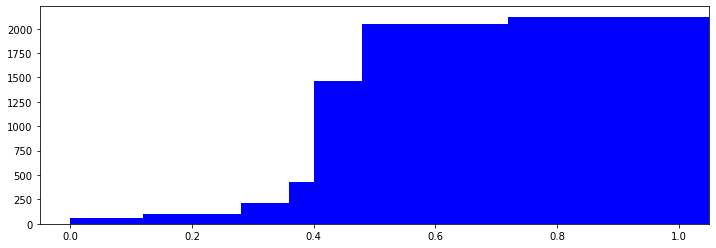

In [21]:
# Look at the distribution of steering angle
num_of_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(cleaned_df['angle'], num_of_bins)

fig, axes = plt.subplots(1,1, figsize=(12,4))
axes.hist(cleaned_df['angle'], bins=num_of_bins, width=1, color='blue')

Training data: 8275
Validation data: 5518


Text(0.5, 1.0, 'Validation Data')

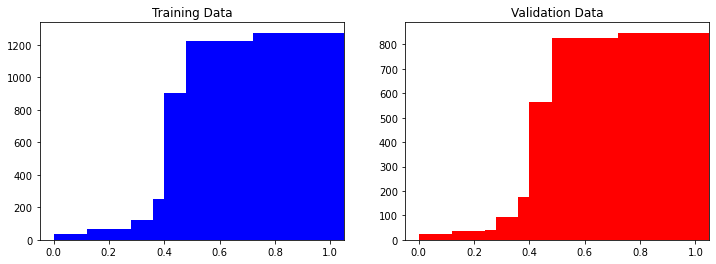

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(cleaned_df['image_path'].to_list(), cleaned_df['angle'].to_list(), test_size=0.4)
print("Training data: %d\nValidation data: %d" % (len(X_train), len(X_valid)))

# plot the distributions of train and valid, make sure they are consistent
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(y_train, bins=num_of_bins, width=1, color='blue')
axes[0].set_title('Training Data')
axes[1].hist(y_valid, bins=num_of_bins, width=1, color='red')
axes[1].set_title('Validation Data')

Text(0.5, 1.0, 'zoomed')

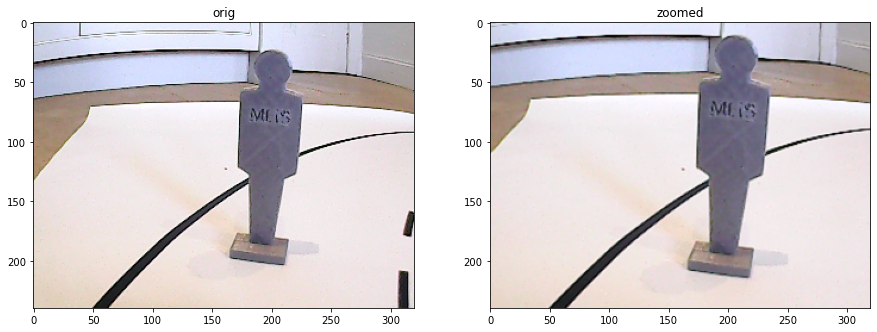

In [23]:
def my_imread(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def zoom(image):
    zoom = img_aug.Affine(scale=(1, 1.3))  # zoom from 100% (no zoom) to 130%
    image = zoom.augment_image(image)
    return image

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread(cleaned_df['image_path'][image_index])
image_zoom = zoom(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_zoom)
axes[1].set_title("zoomed")

Text(0.5, 1.0, 'panned')

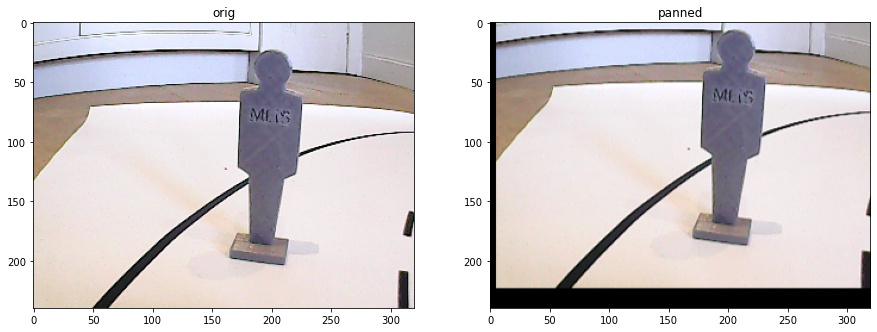

In [24]:
def pan(image):
    # pan left / right / up / down about 10%
    pan = img_aug.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread(cleaned_df['image_path'][image_index])
image_pan = pan(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_pan)
axes[1].set_title("panned")

Text(0.5, 1.0, 'brightness adjusted')

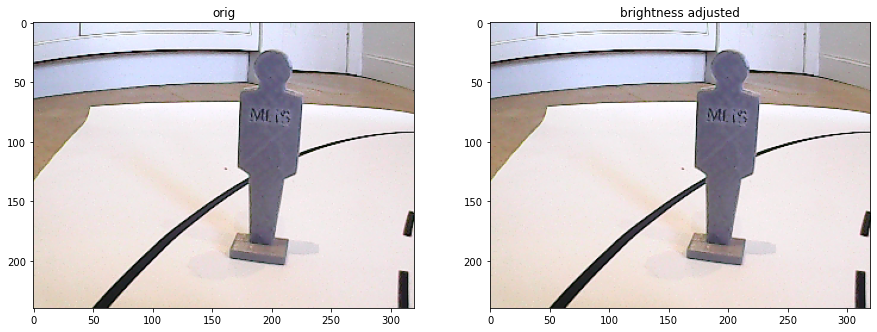

In [25]:
def adjust_brightness(image):
    # increase or decrease brightness by 30%
    brightness = img_aug.Multiply((0.7, 1.3))
    image = brightness.augment_image(image)
    return image

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread(cleaned_df['image_path'][image_index])
image_brightness = adjust_brightness(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_brightness)
axes[1].set_title("brightness adjusted")

Text(0.5, 1.0, 'blurred')

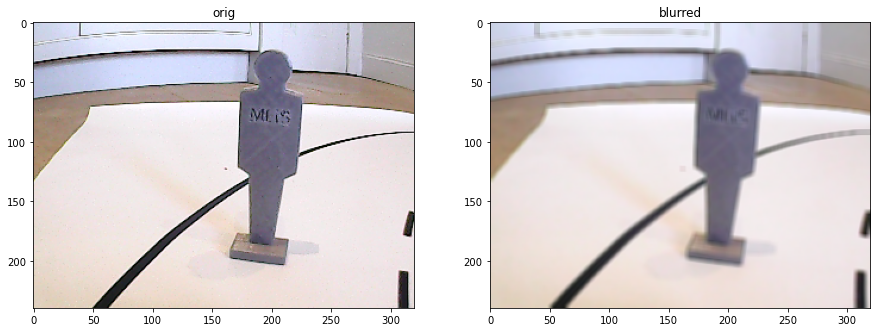

In [26]:
def blur(image):
    kernel_size = random.randint(1, 5)  # kernel larger than 5 would make the image way too blurry
    image = cv2.blur(image,(kernel_size, kernel_size))
   
    return image

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread(cleaned_df['image_path'][image_index])
image_blur = blur(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_blur)
axes[1].set_title("blurred")

Text(0.5, 1.0, 'flipped, angle=0.625')

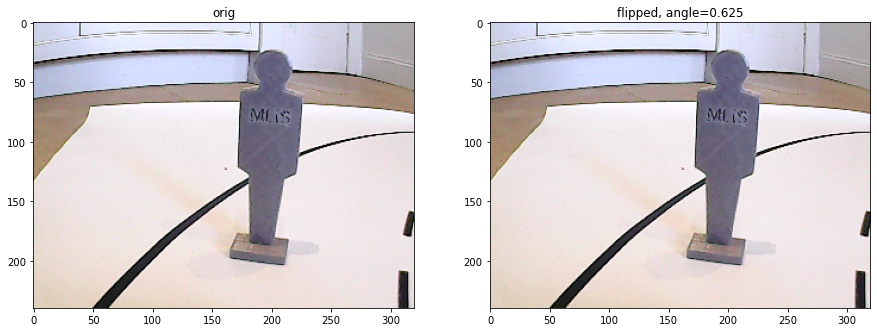

In [27]:
def random_flip(image, steering_angle):
    is_flip = random.randint(0, 1)
    if is_flip == 1:
        # randomly flip horizon
        image = cv2.flip(image,1)
        steering_angle = 180 - steering_angle
   
    return image, steering_angle

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread(cleaned_df['image_path'][image_index])
image_flip, steering_angle = random_flip(image_orig, cleaned_df['angle'][image_index])
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_flip)
axes[1].set_title("flipped, angle=%s" % steering_angle)

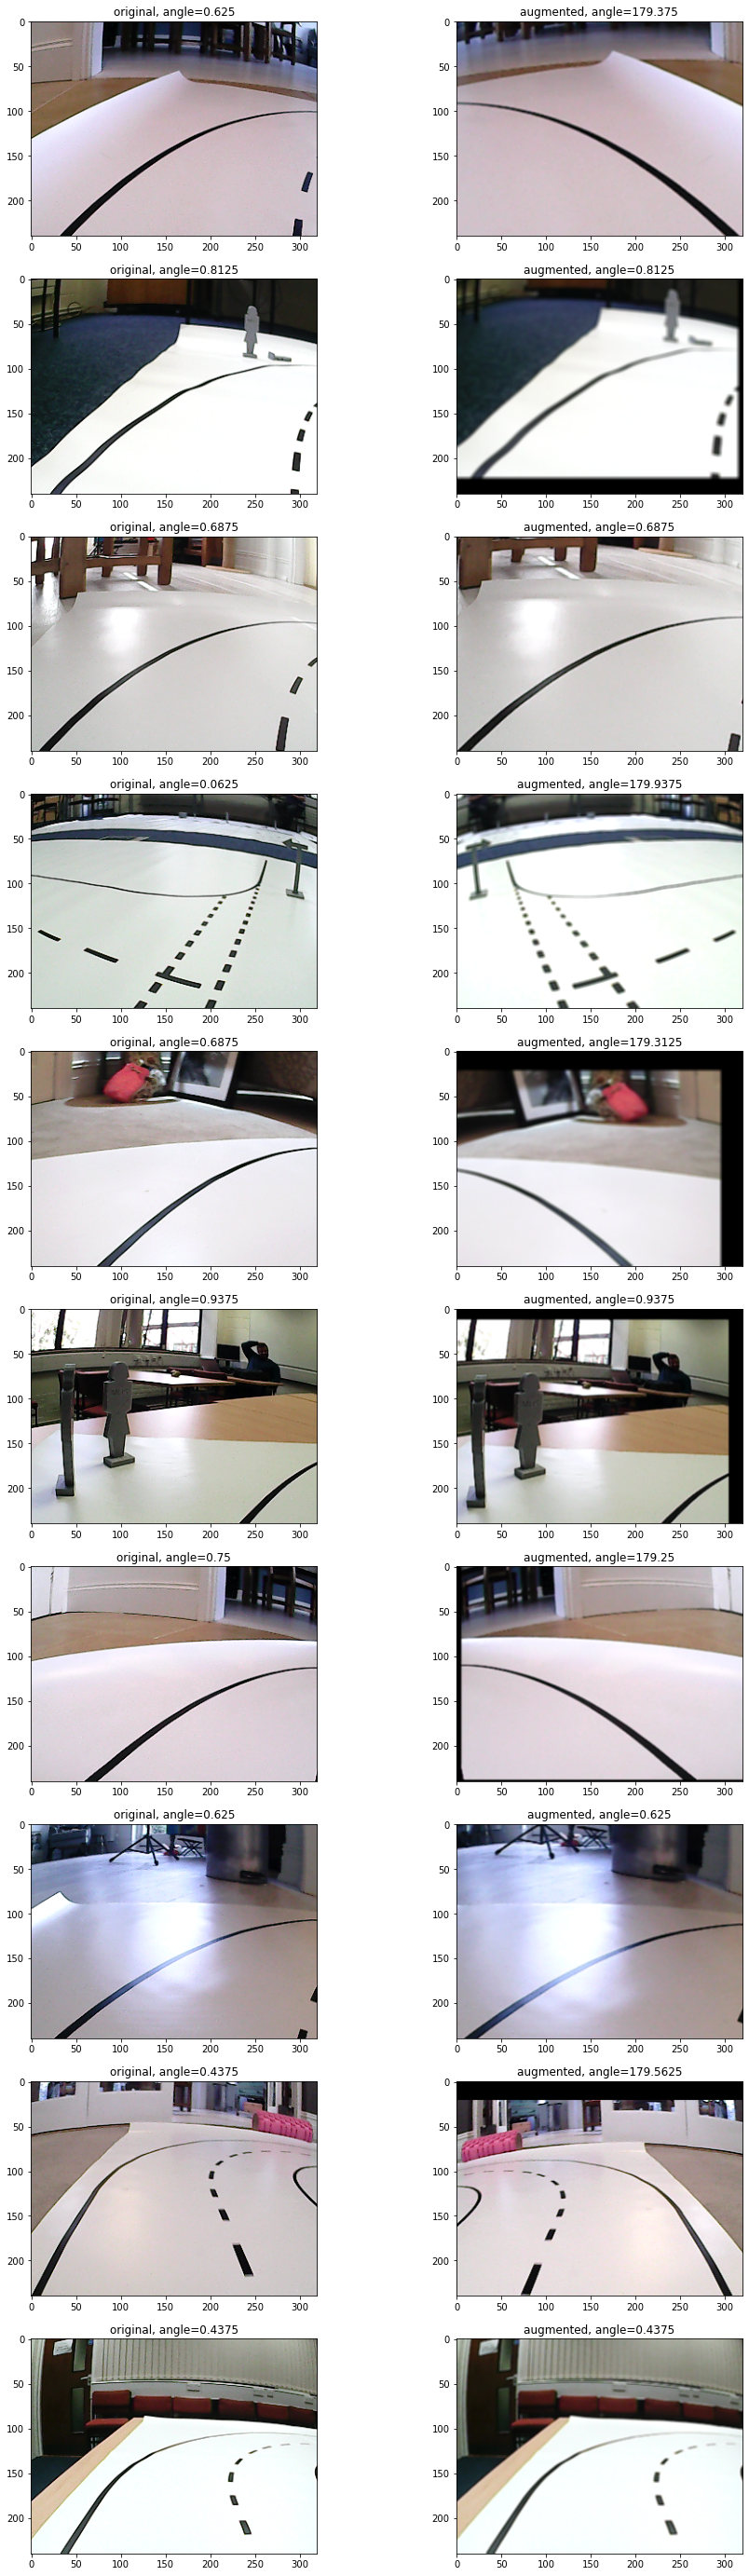

In [28]:
# put it together
def random_augment(image, steering_angle):
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = blur(image)
    if np.random.rand() < 0.5:
        image = adjust_brightness(image)
    image, steering_angle = random_flip(image, steering_angle)
    
    return image, steering_angle

# show a few randomly augmented images
ncol = 2
nrow = 10
fig, axes = plt.subplots(nrow, ncol, figsize=(15, 50))

for i in range(nrow):
    rand_index = random.randint(0, len(cleaned_df['image_path']) - 1)
    image_path = cleaned_df['image_path'][rand_index]
    steering_angle_orig = cleaned_df['angle'][rand_index]
    
    image_orig = my_imread(image_path)
    image_aug, steering_angle_aug = random_augment(image_orig, steering_angle_orig)
    
    axes[i][0].imshow(image_orig)
    axes[i][0].set_title("original, angle=%s" % steering_angle_orig)
    axes[i][1].imshow(image_aug)
    axes[i][1].set_title("augmented, angle=%s" % steering_angle_aug)

Text(0.5, 1.0, 'processed')

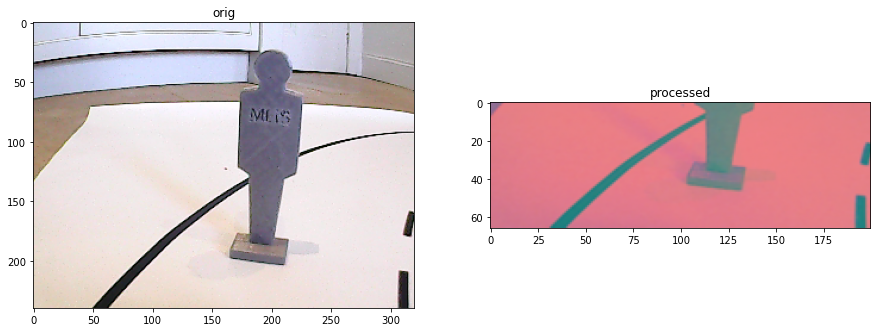

In [29]:
def img_preprocess(image):
    height, _, _ = image.shape
    image = image[int(height/2):,:,:]  # remove top half of the image, as it is not relavant for lane following
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)  # Nvidia model said it is best to use YUV color space
    image = cv2.GaussianBlur(image, (3,3), 0)
    image = cv2.resize(image, (200,66)) # input image size (200,66) Nvidia model
    image = image / 255 # normalizing, the processed image becomes black for some reason.  do we need this?
    return image

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread(cleaned_df['image_path'][image_index])
image_processed = img_preprocess(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_processed)
axes[1].set_title("processed")

In [30]:
def nvidia_model():
    model = Sequential(name='Nvidia_Model_angle')
    
    # elu=Expenential Linear Unit, similar to leaky Relu
    # skipping 1st hiddel layer (nomralization layer), as we have normalized the data
    
    # Convolution Layers
    model.add(Conv2D(24, (5, 5), strides=(2, 2), input_shape=(66, 200, 3), activation='relu')) 
    model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='relu')) 
    model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='relu')) 
    model.add(Conv2D(64, (3, 3), activation='relu')) 
    model.add(Dropout(0.2)) # not in original model. added for more robustness
    model.add(Conv2D(64, (3, 3), activation='relu')) 
    
    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dropout(0.2)) # not in original model. added for more robustness
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='relu'))
    
    # output layer: turn angle (from 45-135, 90 is straight, <90 turn left, >90 turn right)
    model.add(Dense(2, activation='relu')) 
    
    # since this is a regression problem not classification problem,
    # we use MSE (Mean Squared Error) as loss function
    optimizer = tf.optimizers.Adam(learning_rate=1e-2) # lr is learning rate
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

In [31]:
model = nvidia_model()
print(model.summary())

Model: "Nvidia_Model_angle"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 dropout (Dropout)           (None, 3, 20, 64)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)       

In [32]:
def image_data_generator(image_paths, steering_angles, batch_size, is_training):
    while True:
        batch_images = []
        batch_steering_angles = []
        
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            image_path = image_paths[random_index]
            image = my_imread(image_paths[random_index])
            steering_angle = steering_angles[random_index]
            vehicle_speed = int(cleaned_df[cleaned_df['image_id'] == int(pathlib.Path(image_path).name.split('.')[0])]['speed'])
            if is_training:
                # training: augment image
                image, steering_angle = random_augment(image, steering_angle)
              
            image = img_preprocess(image)
            batch_images.append(image)
            batch_steering_angles.append([steering_angle, vehicle_speed])
            
        yield( np.asarray(batch_images), np.asarray(batch_steering_angles))

In [33]:
import pathlib

In [34]:
pathlib.Path(X_train[0]).name.split('.')[0]

'7776'

In [35]:
int(cleaned_df[cleaned_df['image_id'] == int(pathlib.Path(X_train[0]).name.split('.')[0])]['speed'])

1

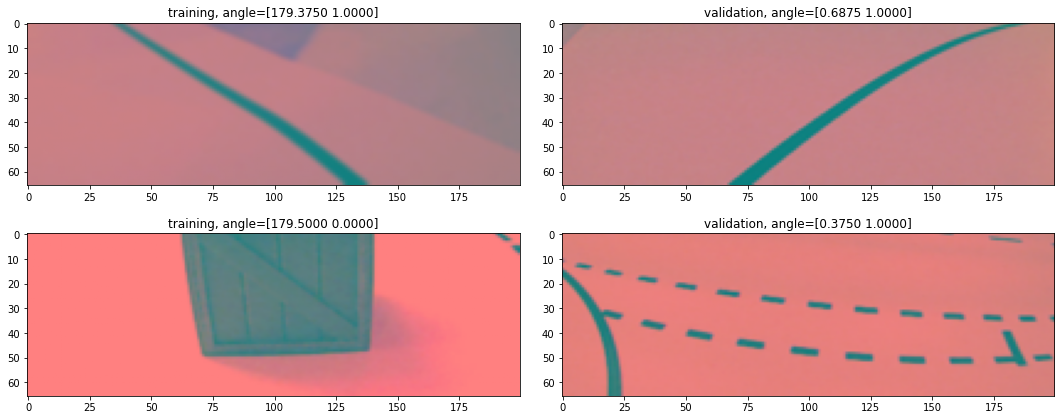

In [36]:
ncol = 2
nrow = 2

X_train_batch, y_train_batch = next(image_data_generator(X_train, y_train, nrow, True))
X_valid_batch, y_valid_batch = next(image_data_generator(X_valid, y_valid, nrow, False))

fig, axes = plt.subplots(nrow, ncol, figsize=(15, 6))
fig.tight_layout()

for i in range(nrow):
    axes[i][0].imshow(X_train_batch[i])
    axes[i][0].set_title("training, angle=%s" % y_train_batch[i])
    axes[i][1].imshow(X_valid_batch[i])
    axes[i][1].set_title("validation, angle=%s" % y_valid_batch[i])

In [37]:
model_output_dir = '../models/angle'

In [38]:
# start Tensorboard before model fit, so we can see the epoch tick in Tensorboard
# Jupyter Notebook embedded Tensorboard is a new feature in TF 2.0!!  

# clean up log folder for tensorboard
log_dir_root = f'{model_output_dir}/logs/'
#!rm -rf $log_dir_root

In [39]:
# saves the model weights after each epoch if the validation loss decreased
checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_output_dir,'lane_navigation_check.h5'), verbose=1, save_best_only=True)

In [40]:
p=next(image_data_generator( X_train, y_train, batch_size=200, is_training=True))

In [41]:
type(p)

tuple

In [42]:
p[1]

array([[0.7500, 1.0000],
       [0.6875, 1.0000],
       [0.4375, 1.0000],
       [179.3125, 0.0000],
       [0.6875, 1.0000],
       [179.3750, 0.0000],
       [179.1250, 1.0000],
       [0.7500, 1.0000],
       [0.7500, 1.0000],
       [0.6250, 1.0000],
       [179.7500, 0.0000],
       [179.5625, 1.0000],
       [0.6875, 1.0000],
       [0.4375, 1.0000],
       [0.5625, 0.0000],
       [179.6250, 1.0000],
       [179.1250, 1.0000],
       [0.7500, 1.0000],
       [0.8125, 1.0000],
       [179.3750, 1.0000],
       [0.7500, 1.0000],
       [0.5000, 1.0000],
       [179.3750, 0.0000],
       [179.5625, 1.0000],
       [179.5000, 1.0000],
       [0.5000, 0.0000],
       [0.8125, 1.0000],
       [179.4375, 1.0000],
       [179.1875, 1.0000],
       [179.3750, 1.0000],
       [179.1875, 1.0000],
       [0.8125, 1.0000],
       [0.5625, 1.0000],
       [0.7500, 1.0000],
       [0.6875, 1.0000],
       [179.3750, 1.0000],
       [0.7500, 1.0000],
       [0.5000, 1.0000],
       [0.7500, 0.

In [43]:
history = model.fit(
    image_data_generator( X_train, y_train, batch_size=200, is_training=True),
    steps_per_epoch=300,
    epochs=10,
    validation_data = image_data_generator( X_valid, y_valid, batch_size=200, is_training=False),
    validation_steps=200,
    verbose=1,
    shuffle=1,
    callbacks=[checkpoint_callback]
)

Epoch 1/10
300/300 [==============================] - ETA: 0s - loss: 7341.5513
Epoch 1: val_loss improved from inf to 4728.46338, saving model to ../models/angle\lane_navigation_check.h5
300/300 [==============================] - 468s 2s/step - loss: 7341.5513 - val_loss: 4728.4634
Epoch 2/10
300/300 [==============================] - ETA: 0s - loss: 4046.9724
Epoch 2: val_loss improved from 4728.46338 to 3793.40796, saving model to ../models/angle\lane_navigation_check.h5
300/300 [==============================] - 471s 2s/step - loss: 4046.9724 - val_loss: 3793.4080
Epoch 3/10
300/300 [==============================] - ETA: 0s - loss: 4029.7473
Epoch 3: val_loss did not improve from 3793.40796
300/300 [==============================] - 488s 2s/step - loss: 4029.7473 - val_loss: 4030.8479
Epoch 4/10
300/300 [==============================] - ETA: 0s - loss: 4028.2737
Epoch 4: val_loss did not improve from 3793.40796
300/300 [==============================] - 477s 2s/step - loss: 4028.

In [44]:
history.history

{'loss': [7341.55126953125,
  4046.972412109375,
  4029.747314453125,
  4028.273681640625,
  4045.741943359375,
  4019.266357421875,
  4021.87109375,
  4024.840576171875,
  4012.740234375,
  4024.2705078125],
 'val_loss': [4728.46337890625,
  3793.407958984375,
  4030.847900390625,
  4716.08935546875,
  3856.9287109375,
  4119.46142578125,
  4149.71533203125,
  3974.848876953125,
  3790.681884765625,
  3672.999267578125]}

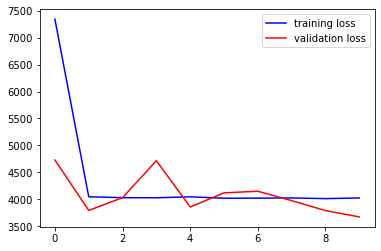

In [45]:
history
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')
plt.legend(["training loss", "validation loss"])

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

def summarize_prediction(Y_true, Y_pred):
    
    mse = mean_squared_error(Y_true, Y_pred)
    r_squared = r2_score(Y_true, Y_pred)
    
    print(f'mse       = {mse:.2}')
    print(f'r_squared = {r_squared:.2%}')
    print()
    
def predict_and_summarize(X, Y):
    model = load_model(f'{model_output_dir}/lane_navigation_check.h5')
    Y_pred = model.predict(X)
    summarize_prediction(Y, Y_pred)
    return Y_pred

mse       = 3.7e+03
r_squared = -18973446.35%



TypeError: only size-1 arrays can be converted to Python scalars

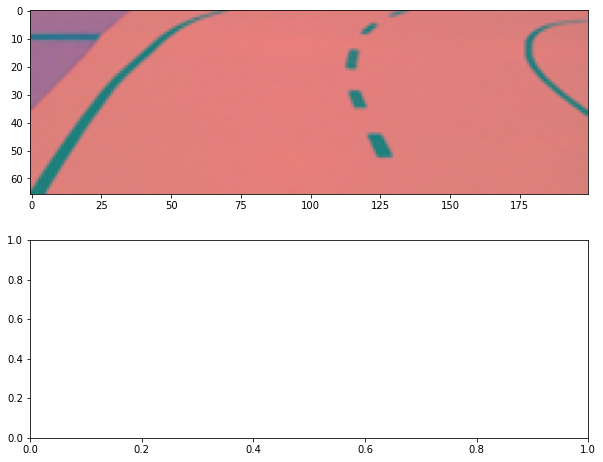

In [47]:
n_tests = 500
X_test, y_test = next(image_data_generator(X_valid, y_valid, 100, False))

y_pred = predict_and_summarize(X_test, y_test)

n_tests_show = 2
fig, axes = plt.subplots(n_tests_show, 1, figsize=(10, 4 * n_tests_show))
for i in range(n_tests_show):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"actual angle={y_test[i]}, predicted angle={int(y_pred[i])}, diff = {int(y_pred[i])-y_test[i]}")

In [ ]:
'''
mse       = 7.5e+01
r_squared = 52.78%
'''

'\nmse       = 3.5e+01\nr_squared = 77.42%\n'